In [22]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

TINY_SIZE = 14
SMALL_SIZE = 14
MEDIUM_SIZE = 16
BIGGER_SIZE = 20
#sns.set(style="darkgrid")
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],
    "font.size": BIGGER_SIZE,
    "axes.labelsize": MEDIUM_SIZE,
    "axes.titlesize": BIGGER_SIZE,
    "xtick.labelsize": TINY_SIZE, 
    "ytick.labelsize": TINY_SIZE, 
    "legend.fontsize": TINY_SIZE, 
    "figure.titlesize": BIGGER_SIZE, 
})

In [23]:
data_exp_0 = pd.read_csv("../data_teachers/ToySGD/exponential_decay/0/Ackley/aggregated_run_data.csv")
data_step_0 = pd.read_csv("../data_teachers/ToySGD/step_decay/42/Ackley/aggregated_run_data.csv")
data_step_1 = pd.read_csv("../data_teachers/ToySGD/step_decay/43/Ackley/aggregated_run_data.csv")
data_sgdr_0 = pd.read_csv("../data_teachers/ToySGD/sgdr/0/Ackley/aggregated_run_data.csv")

data_all = [data_step_0, data_step_1, data_exp_0, data_sgdr_0]

for data in data_all:
    data["action"] = data["action"].map(lambda x: 10**x)
drawstyles = ["steps-post", "steps-post", "default", "default"]
colors = ["#0073E6", "#28A745", "#DC3545", "#FFC107"]

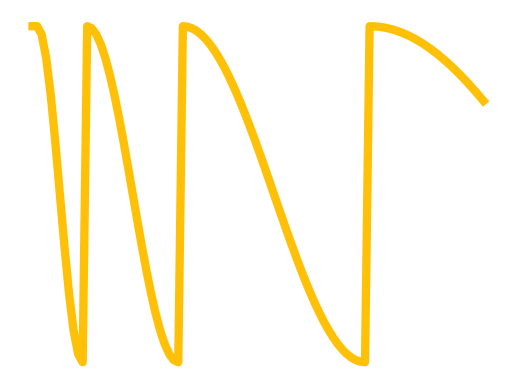

In [28]:
for i, (data, drawstyle) in enumerate(zip(data_all, drawstyles)):
    plt.clf()
    ax = sns.lineplot(
            data=data,
            x="batch",
            y="action",
            drawstyle=drawstyle,
            legend=False,
            color=colors[i],
            linewidth=6
        )
    #ax.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
    #ax.tick_params(axis='y', which='both', left=False, right=False, labelleft=False)
    #ax.set_xlabel('')
    #ax.set_ylabel('')
    ax.axis('off')
    plt.savefig(Path("figures", f"teacher_meth_{i}.svg"), bbox_inches="tight")